# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     2.963982e+01     6.734113e+00
 * time: 0.0042171478271484375
     1     2.762392e+01     4.311715e+00
 * time: 0.012248992919921875
     2     2.256077e+01     5.175262e+00
 * time: 0.031327009201049805
     3     1.359912e+01     1.520242e+00
 * time: 0.05383110046386719
     4     1.271246e+01     2.030001e+00
 * time: 0.06894111633300781
     5     1.096385e+01     1.790182e+00
 * time: 0.08405518531799316
     6     9.754501e+00     2.109047e+00
 * time: 0.09911918640136719
     7     9.262332e+00     1.343545e+00
 * time: 0.11409807205200195
     8     8.836507e+00     1.231668e+00
 * time: 0.12941312789916992
     9     8.509589e+00     5.325508e-01
 * time: 0.14491510391235352
    10     8.335480e+00     3.373662e-01
 * time: 0.1601240634918213
    11     8.220487e+00     4.353324e-01
 * time: 0.17519116401672363
    12     8.202823e+00     7.782972e-01
 * time: 0.18657517433166504
    13     8.179717e+00     5.103840e-01
 * ti

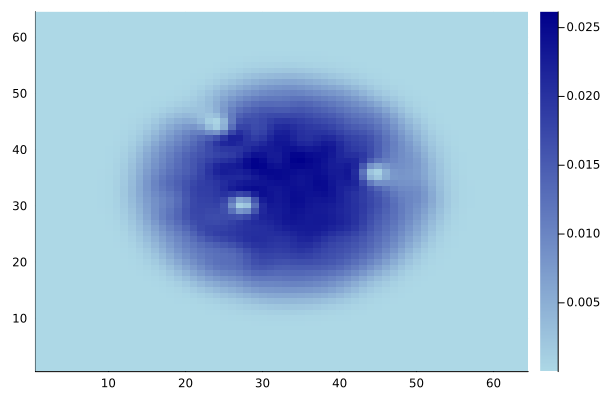

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)